https://datahack.analyticsvidhya.com/contest/india-ml-hiring-hackathon-2019/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling
import scipy.stats as stats
import matplotlib.pyplot as plt

C:\Users\User\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\User\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\User\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\User\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\User\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\Users\User\Anac

In [102]:
data = pd.read_csv('F:\\Analytix\\Git\\Analytix\\Hackathon\\train_u5jK80M\\train.csv')
data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                  

In [104]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,116058.0,5.494155e+11,2.597560e+11,1.000009e+11,3.244656e+11,5.486239e+11,7.743034e+11,9.999971e+11
interest_rate,116058.0,3.868961e+00,4.610200e-01,2.250000e+00,3.500000e+00,3.875000e+00,4.125000e+00,6.750000e+00
unpaid_principal_bal,116058.0,2.082262e+05,1.146851e+05,1.100000e+04,1.200000e+05,1.830000e+05,2.780000e+05,1.200000e+06
loan_term,116058.0,2.922810e+02,8.976241e+01,6.000000e+01,1.800000e+02,3.600000e+02,3.600000e+02,3.600000e+02
loan_to_value,116058.0,6.743194e+01,1.729172e+01,6.000000e+00,5.700000e+01,7.200000e+01,8.000000e+01,9.700000e+01
number_of_borrowers,116058.0,1.593186e+00,4.912417e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
debt_to_income_ratio,116058.0,3.074229e+01,9.730798e+00,1.000000e+00,2.300000e+01,3.100000e+01,3.900000e+01,6.400000e+01
borrower_credit_score,116058.0,7.699268e+02,4.221071e+01,0.000000e+00,7.510000e+02,7.820000e+02,8.000000e+02,8.400000e+02
insurance_percent,116058.0,2.786288e+00,8.096464e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01
co-borrower_credit_score,116058.0,4.596116e+02,3.819469e+02,0.000000e+00,0.000000e+00,7.400000e+02,7.910000e+02,8.360000e+02


In [105]:
# profile = pandas_profiling.ProfileReport(data)

In [106]:
# profile.to_file(outputfile='profiling.html')

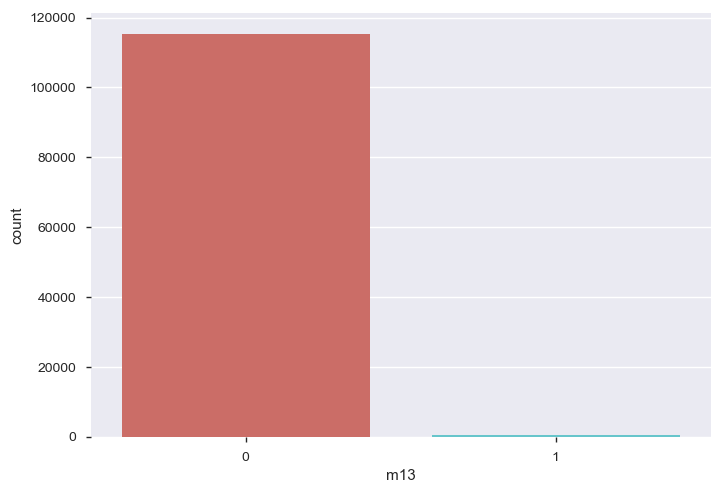

In [107]:
sns.countplot(x='m13',data=data,palette='hls')
plt.show()

In [108]:
defaulter = data[data['m13'] == 1]
non_defaulter = data[data['m13'] == 0]
print(len(defaulter))
print(len(non_defaulter))

636
115422


In [109]:
default_indices = np.array(data[data['m13'] == 1].index)
non_default_indices = np.array(data[data['m13'] == 0].index)

In [110]:
def undersample(default_indices,non_default_indices,times):
    undersampling_indices = np.array(np.random.choice(p=non_default_indices,size=times*len(default_indices),replace=False))
    total_indices = np.concatenate([default_indices,undersampling_indices])
    undersample = data.iloc[total_indices,:]
    print("the non_defaulter proportion is :",len(undersample[undersample.m13==0])/len(undersample[undersample.m13]))
    print("the defaulter proportion is :",len(undersample[undersample.m13==1])/len(undersample[undersample.m13]))
    print("total number of record in resampled data is:",len(undersample[undersample.m13]))
    return(undersample)

https://www.kaggle.com/gargmanish/how-to-handle-imbalance-data-study-in-detail

In [111]:
data.groupby('m13').mean()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
m13,,,,,,,,,,,,,,,,,,,,,
0,5.494730e+11,3.867103,208371.965483,292.124404,67.410944,1.594644,30.714820,770.221985,2.782849,460.820823,...,0.001326,0.001170,0.001941,0.001551,0.001845,0.001975,0.001845,0.002565,0.002149,0.001897
1,5.389809e+11,4.206182,181776.729560,320.699686,71.242138,1.328616,35.727987,716.352201,3.410377,240.154088,...,0.119497,0.185535,0.292453,0.342767,0.424528,0.522013,0.643082,0.742138,0.907233,1.127358


In [112]:
num_vars = [col for col in dict(data.dtypes) if dict(data.dtypes)[col] in ['float64','int64']]
cat_vars = [col for col in dict(data.dtypes) if dict(data.dtypes)[col] in ['object']]
print(num_vars)
print(cat_vars)

['loan_id', 'interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13']
['source', 'financial_institution', 'origination_date', 'first_payment_date', 'loan_purpose']


In [113]:
cat_vars = ['source',
            'financial_institution',
            'origination_date',
            'first_payment_date',
            'loan_purpose',
            'insurance_type',
            'number_of_borrowers']
num_vars = ['loan_id',
            'interest_rate',
            'unpaid_principal_bal',
            'loan_term',
            'loan_to_value',
            'debt_to_income_ratio',
            'borrower_credit_score',
            'insurance_percent',
            'co-borrower_credit_score']
ordinal_vars = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13']

In [114]:
data_num = data[num_vars]
data_num.head()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score
0,268055008619,4.250,214000,360,95,22.0,694.0,30.0,0.0
1,672831657627,4.875,144000,360,72,44.0,697.0,0.0,0.0
2,742515242108,3.250,366000,180,49,33.0,780.0,0.0,0.0
3,601385667462,4.750,135000,360,46,44.0,633.0,0.0,638.0
4,273870029961,4.750,124000,360,80,43.0,681.0,0.0,0.0


In [115]:
data_cat = data[cat_vars]
data_cat.head()

,source,financial_institution,origination_date,first_payment_date,loan_purpose,insurance_type,number_of_borrowers
0,Z,"Turner, Baldwin and Rhodes",2012-03-01,05/2012,C86,0.0,1.0
1,Y,"Swanson, Newton and Miller",2012-01-01,03/2012,B12,0.0,1.0
2,Z,Thornton-Davis,2012-01-01,03/2012,B12,0.0,1.0
3,X,OTHER,2012-02-01,04/2012,B12,0.0,2.0
4,X,OTHER,2012-02-01,04/2012,C86,0.0,1.0


In [116]:
data_ord = data[ordinal_vars]
data_ord.head()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,1,1,1,1
4,0,1,2,3,4,5,6,7,8,9,10,11,1


In [117]:
data_cat.drop(columns=['origination_date','first_payment_date'],inplace=True)
data_cat.head()

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,source,financial_institution,loan_purpose,insurance_type,number_of_borrowers
0,Z,"Turner, Baldwin and Rhodes",C86,0.0,1.0
1,Y,"Swanson, Newton and Miller",B12,0.0,1.0
2,Z,Thornton-Davis,B12,0.0,1.0
3,X,OTHER,B12,0.0,2.0
4,X,OTHER,C86,0.0,1.0


In [118]:
def outlierCapping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x
data_num = data_num.apply(lambda x: outlierCapping(x))

In [119]:
data_num.corr()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score
loan_id,1.000000,-0.000843,0.005690,-0.001180,0.000670,0.003926,0.000400,0.000973,0.001917
interest_rate,-0.000843,1.000000,0.000071,0.728452,0.275547,0.183511,-0.223086,0.146604,-0.138254
unpaid_principal_bal,0.005690,0.000071,1.000000,0.192964,0.063857,0.073973,0.054287,0.012471,0.133517
loan_term,-0.001180,0.728452,0.192964,1.000000,0.292569,0.138152,-0.076748,0.191166,-0.110245
loan_to_value,0.000670,0.275547,0.063857,0.292569,1.000000,0.126334,-0.152916,0.491360,-0.109829
debt_to_income_ratio,0.003926,0.183511,0.073973,0.138152,0.126334,1.000000,-0.205020,0.066894,-0.145745
borrower_credit_score,0.000400,-0.223086,0.054287,-0.076748,-0.152916,-0.205020,1.000000,-0.069537,0.161513
insurance_percent,0.000973,0.146604,0.012471,0.191166,0.491360,0.066894,-0.069537,1.000000,-0.063485
co-borrower_credit_score,0.001917,-0.138254,0.133517,-0.110245,-0.109829,-0.145745,0.161513,-0.063485,1.000000


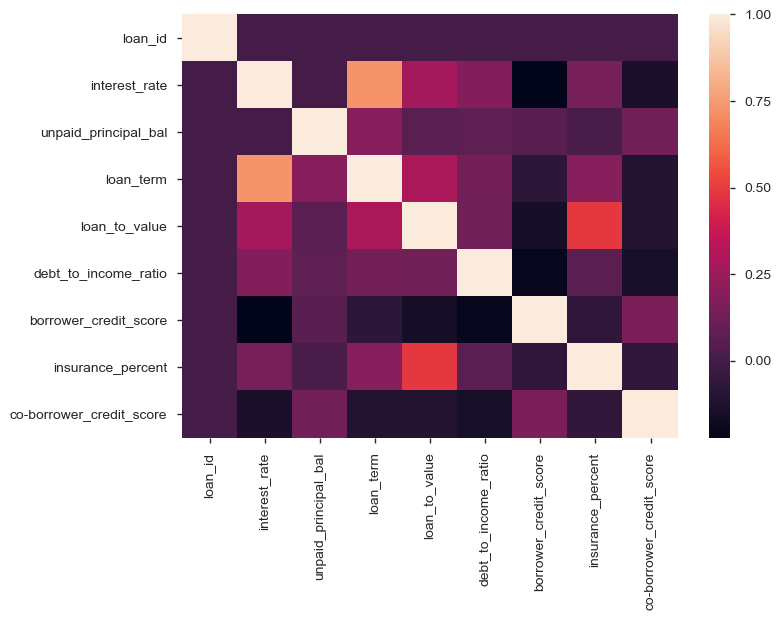

In [120]:
corr = data_num.corr()
sns.heatmap(corr)

In [121]:
data_cat = data_cat.apply(lambda x: x.astype('category'))
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 5 columns):
source                   116058 non-null category
financial_institution    116058 non-null category
loan_purpose             116058 non-null category
insurance_type           116058 non-null category
number_of_borrowers      116058 non-null category
dtypes: category(5)
memory usage: 567.9 KB


In [122]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [123]:
def create_dummies(df,colname):
    col_dummies = pd.get_dummies(df[colname],prefix=colname,drop_first=True)
    df = pd.concat([df,col_dummies],axis=1)
    df.drop(colname,axis=1,inplace=True)
    return df

In [124]:
data_cat_new = data_cat
for col in data_cat.columns:
    data_cat_new = create_dummies(data_cat_new,col)
data_cat_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 24 columns):
source_Y                                             116058 non-null uint8
source_Z                                             116058 non-null uint8
financial_institution_Browning-Hart                  116058 non-null uint8
financial_institution_Chapman-Mcmahon                116058 non-null uint8
financial_institution_Cole, Brooks and Vincent       116058 non-null uint8
financial_institution_Edwards-Hoffman                116058 non-null uint8
financial_institution_Martinez, Duffy and Bird       116058 non-null uint8
financial_institution_Miller, Mcclure and Allen      116058 non-null uint8
financial_institution_Nicholson Group                116058 non-null uint8
financial_institution_OTHER                          116058 non-null uint8
financial_institution_Richards-Walters               116058 non-null uint8
financial_institution_Richardson Ltd                 116058 non-

In [125]:
data_new = pd.concat([data_num,data_cat_new,data_ord],axis=1)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 46 columns):
loan_id                                              116058 non-null float64
interest_rate                                        116058 non-null float64
unpaid_principal_bal                                 116058 non-null float64
loan_term                                            116058 non-null float64
loan_to_value                                        116058 non-null float64
debt_to_income_ratio                                 116058 non-null float64
borrower_credit_score                                116058 non-null float64
insurance_percent                                    116058 non-null float64
co-borrower_credit_score                             116058 non-null float64
source_Y                                             116058 non-null uint8
source_Z                                             116058 non-null uint8
financial_institution_Browning-Hart           

In [153]:
# data_new.rename(columns={'co-borrower_credit_score': 'co_borrower_credit_score'},inplace=True)
data_new.columns = [var.strip().replace('-','_') for var in data_new.columns]
data_new.columns = [var.strip().replace(' ','_') for var in data_new.columns]
data_new.columns = [var.strip().replace(',','_') for var in data_new.columns]

In [154]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 44 columns):
interest_rate                                        116058 non-null float64
unpaid_principal_bal                                 116058 non-null float64
loan_term                                            116058 non-null float64
loan_to_value                                        116058 non-null float64
debt_to_income_ratio                                 116058 non-null float64
insurance_percent                                    116058 non-null float64
co_borrower_credit_score                             116058 non-null float64
source_Y                                             116058 non-null uint8
source_Z                                             116058 non-null uint8
financial_institution_Browning_Hart                  116058 non-null uint8
financial_institution_Chapman_Mcmahon                116058 non-null uint8
financial_institution_Cole__Brooks_and_Vincent    

In [155]:
data_new.describe()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,insurance_percent,co_borrower_credit_score,source_Y,source_Z,financial_institution_Browning_Hart,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,3.867114,207808.345827,292.336883,67.461950,30.761309,2.770098,459.586767,0.323580,0.126196,0.274449,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,0.452785,112880.558895,89.646335,17.154091,9.663045,8.036764,381.923425,0.467844,0.332071,0.446238,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,2.875000,43000.000000,120.000000,21.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,120000.000000,180.000000,57.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.875000,183000.000000,360.000000,72.000000,31.000000,0.000000,740.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.125000,278000.000000,360.000000,80.000000,39.000000,0.000000,791.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,554000.000000,360.000000,95.000000,49.000000,30.000000,819.000000,1.000000,1.000000,1.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [156]:
# profile_new = pandas_profiling.ProfileReport(data_new)
# profile_new.to_file(outputfile='profile_new.html')

In [139]:
data_new.drop(columns=['borrower_credit_score'],inplace=True)
#High correlation with 

KeyError: "['borrower_credit_score'] not found in axis"

In [157]:
data_new.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,insurance_percent,co_borrower_credit_score,source_Y,source_Z,financial_institution_Browning_Hart,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,4.250,214000.0,360.0,95.0,22.0,30.0,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,4.875,144000.0,360.0,72.0,44.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,3.250,366000.0,180.0,49.0,33.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,4.750,135000.0,360.0,46.0,44.0,0.0,638.0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
4,4.750,124000.0,360.0,80.0,43.0,0.0,0.0,0,0,0,...,3,4,5,6,7,8,9,10,11,1


In [148]:
data_new.drop(columns=['loan_id'],inplace=True)

KeyError: "['loan_id'] not found in axis"

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


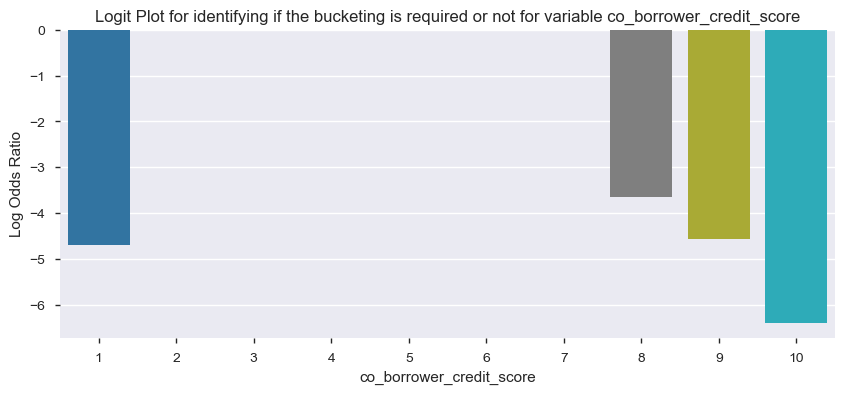

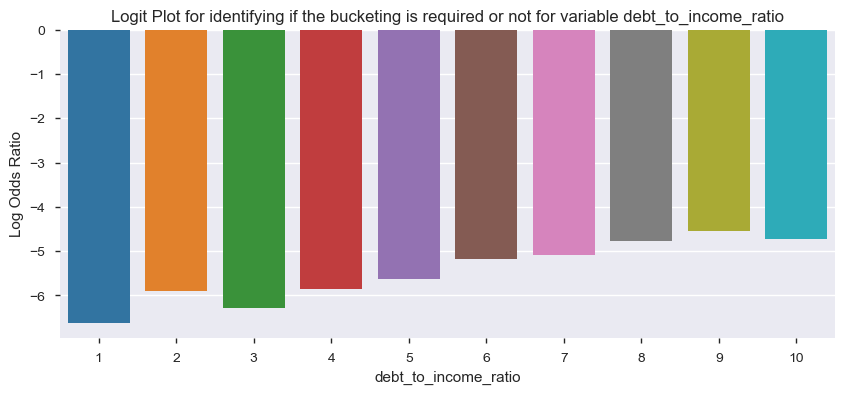

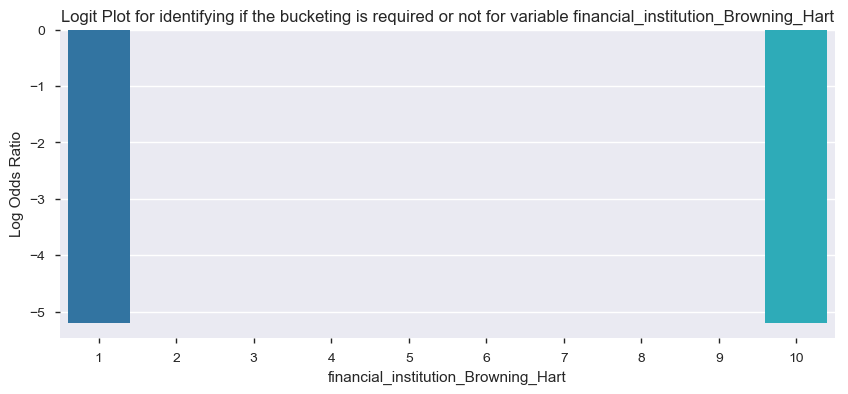

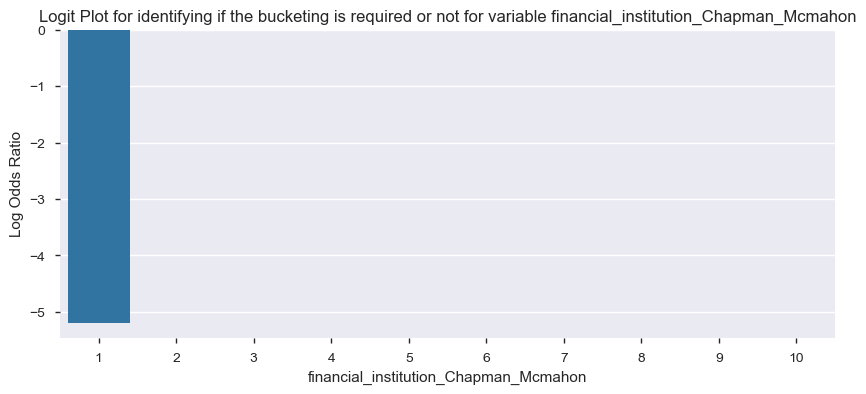

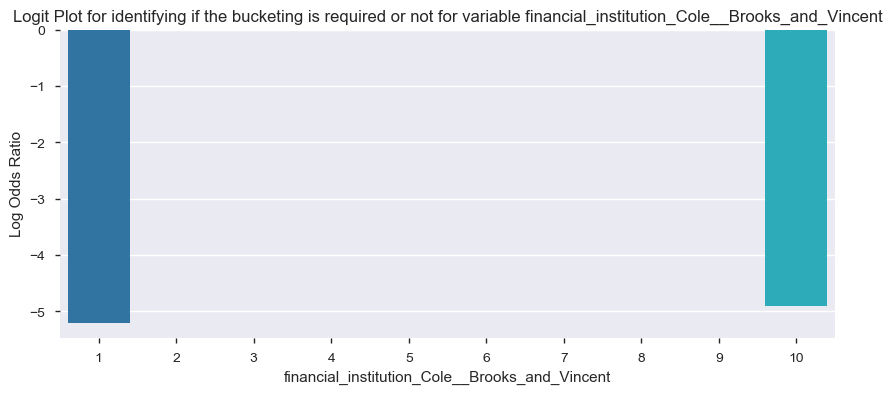

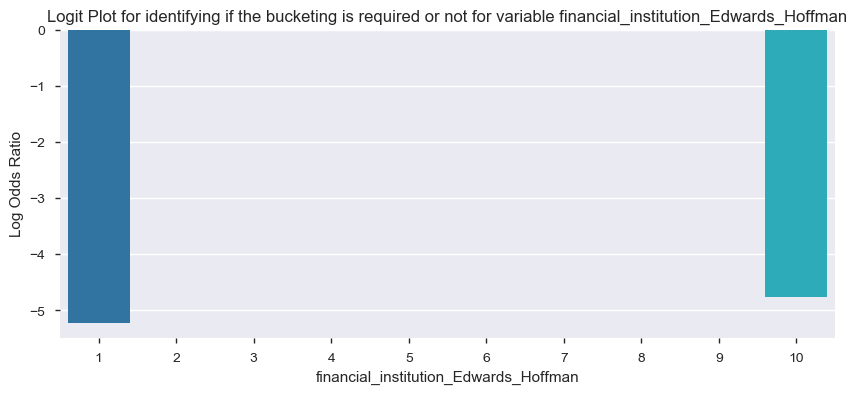

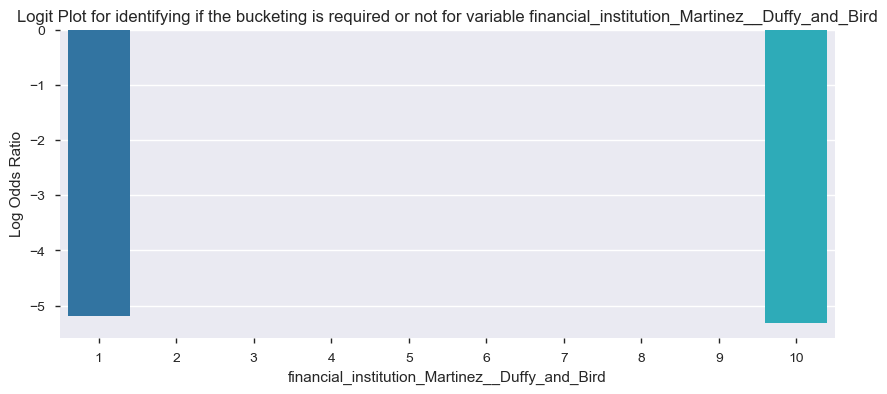

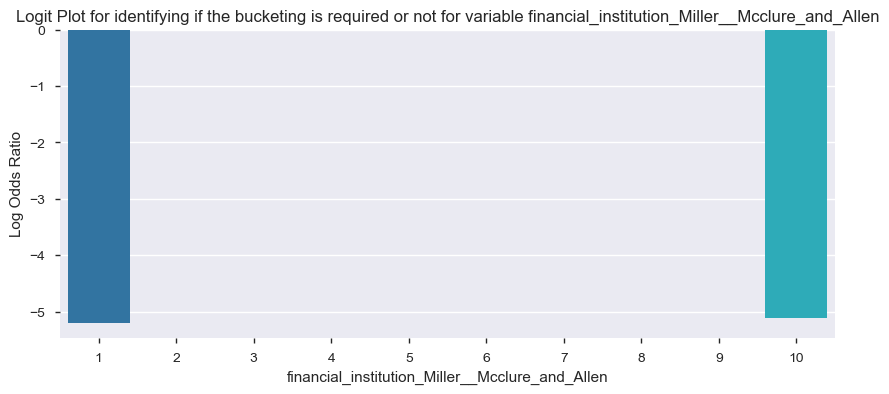

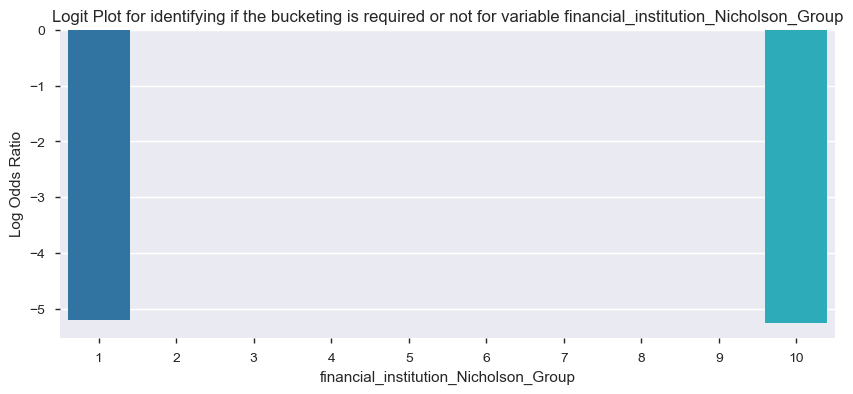

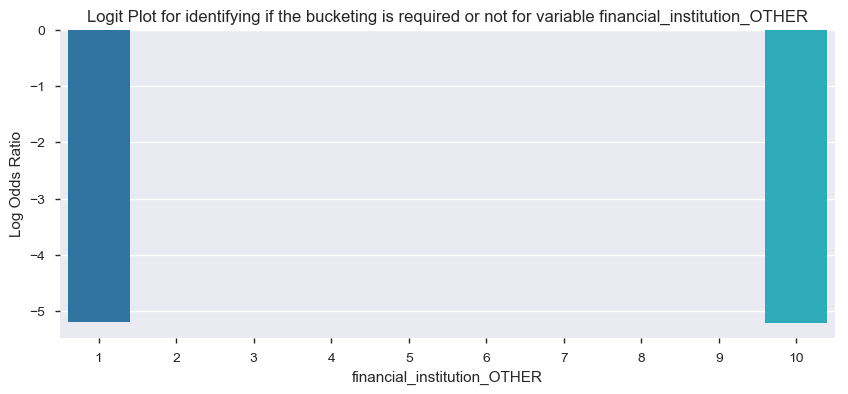

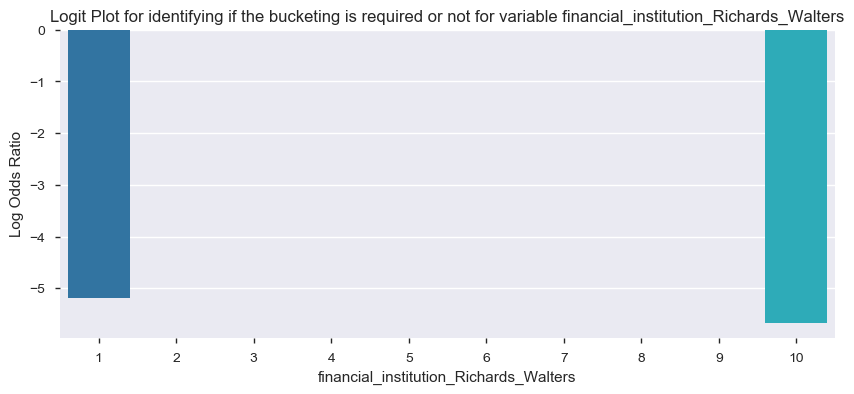

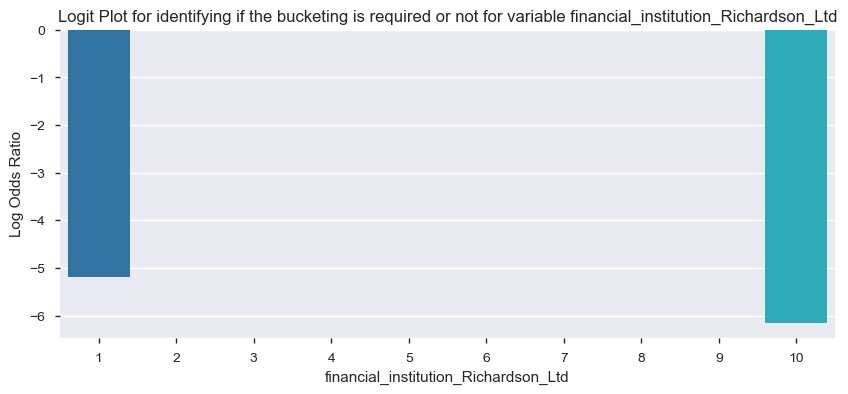

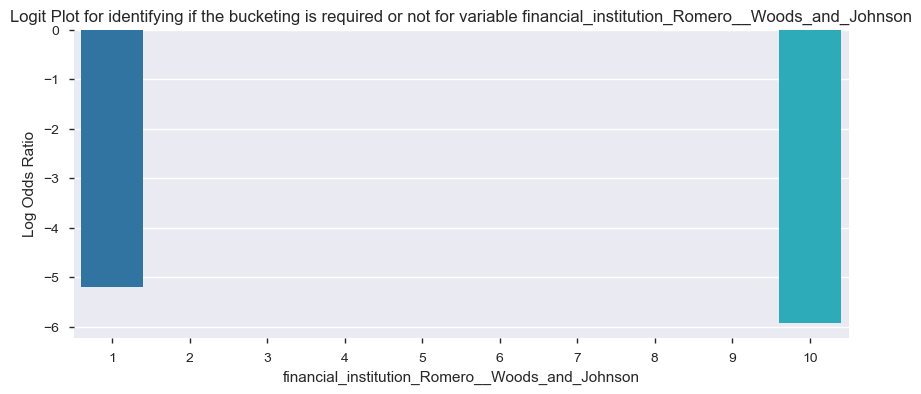

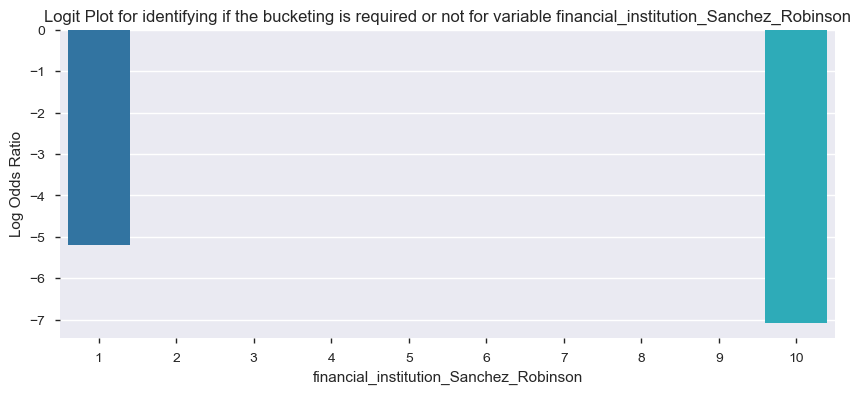

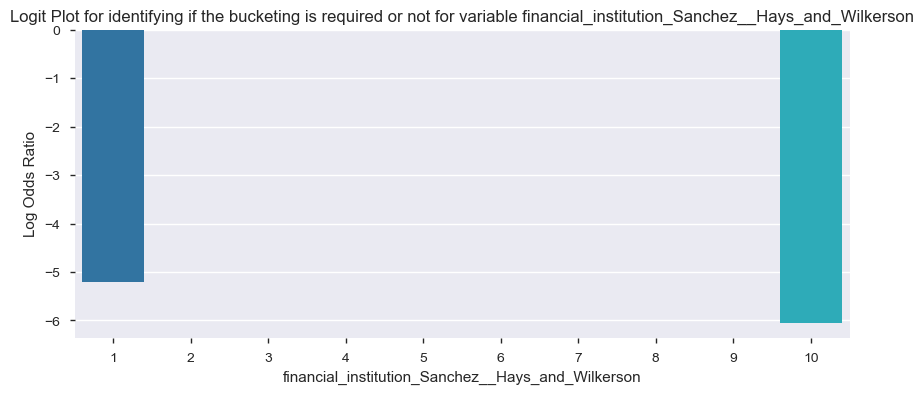

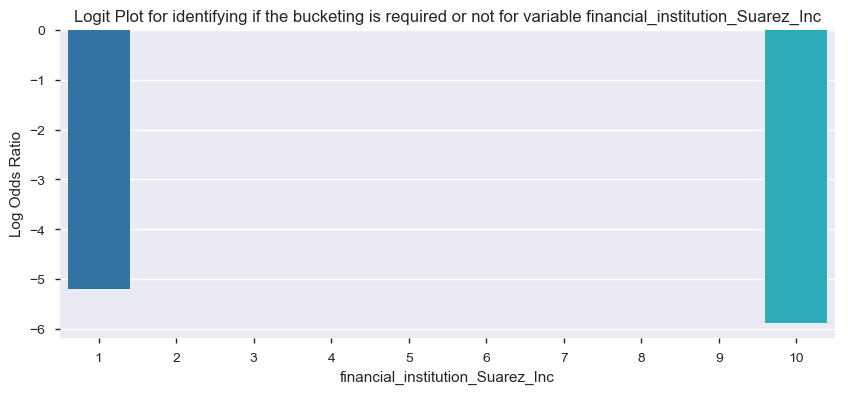

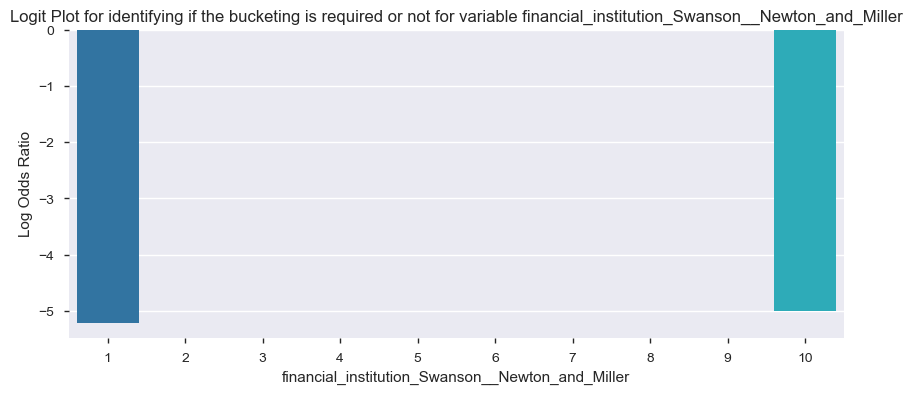

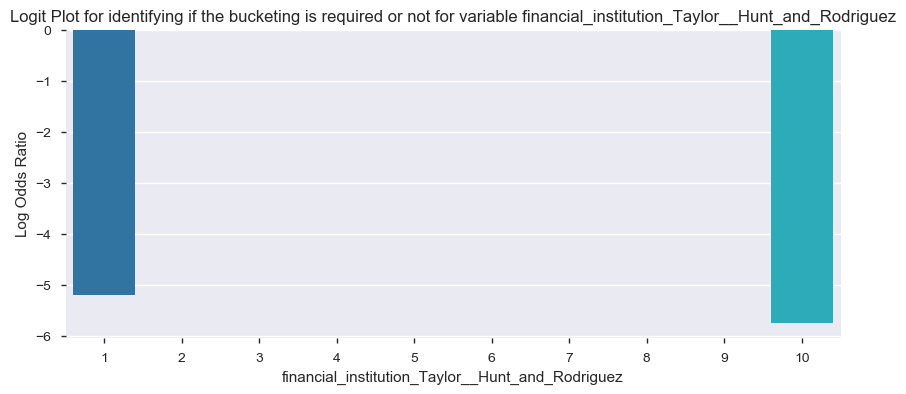

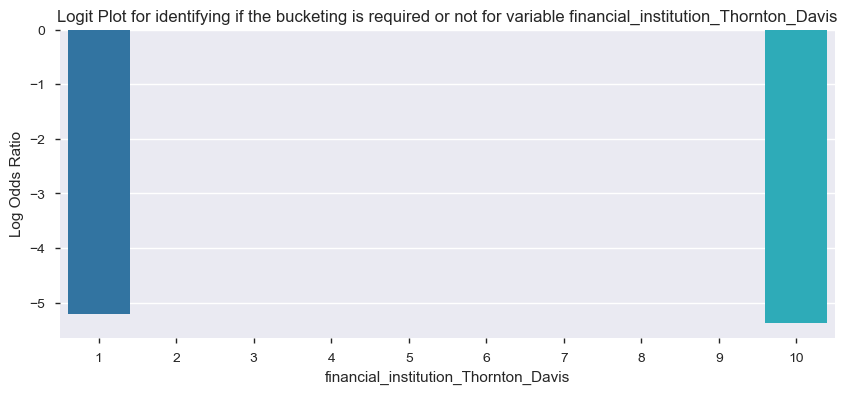

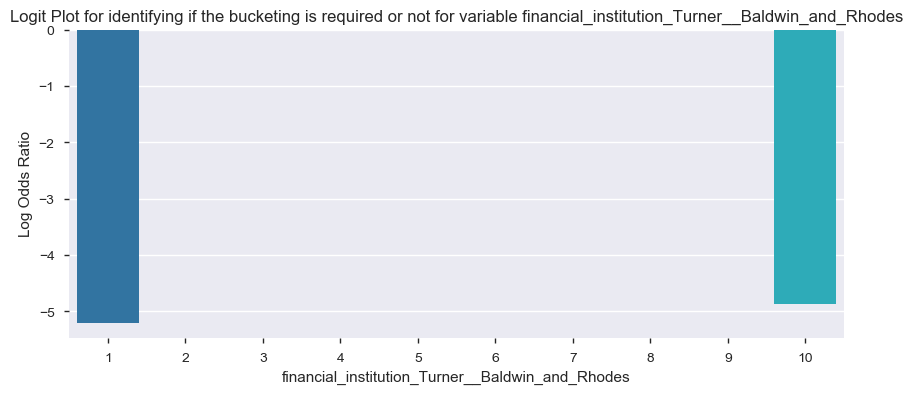

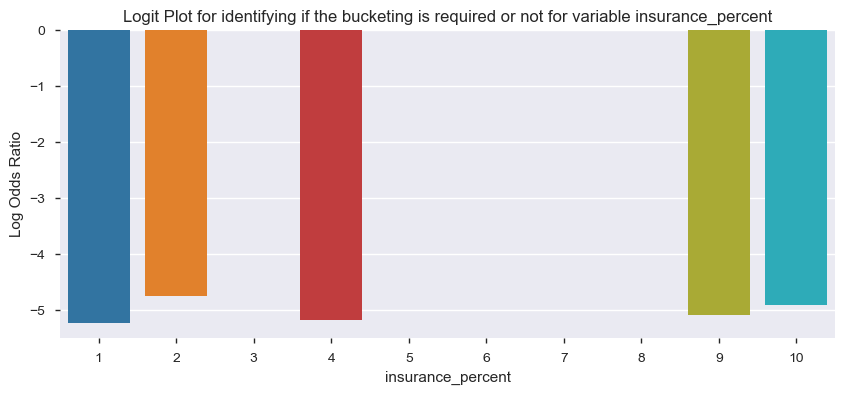

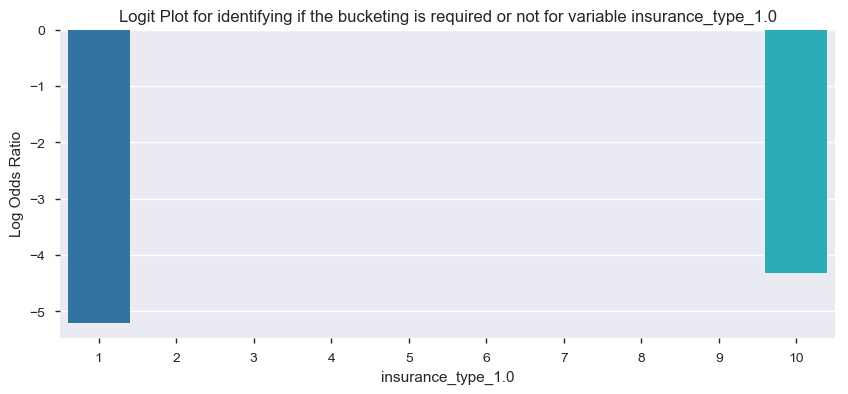

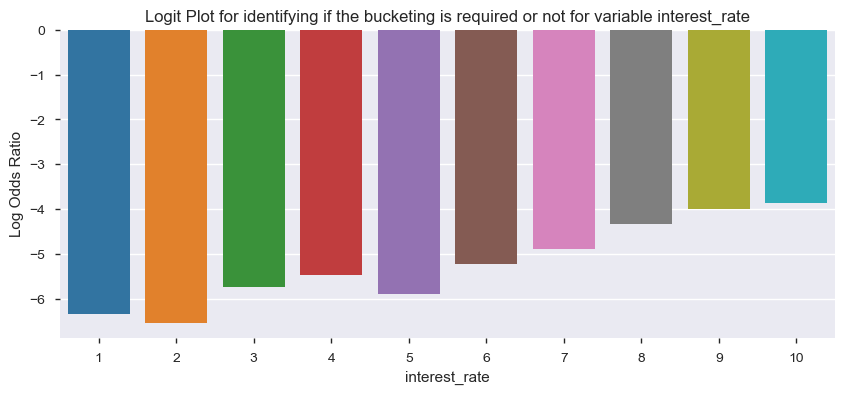

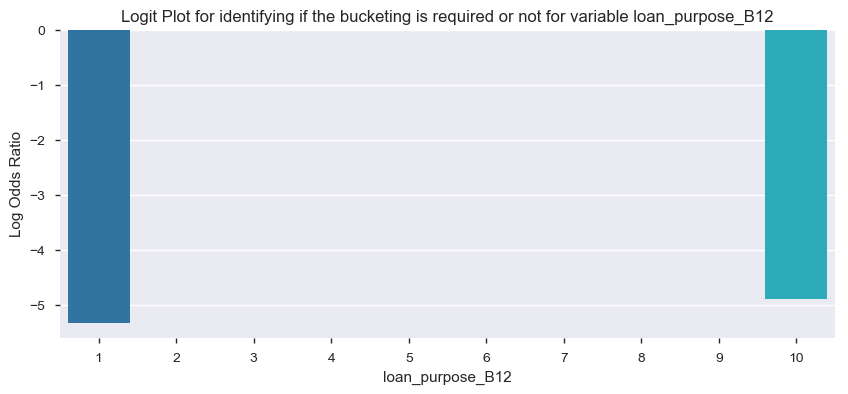

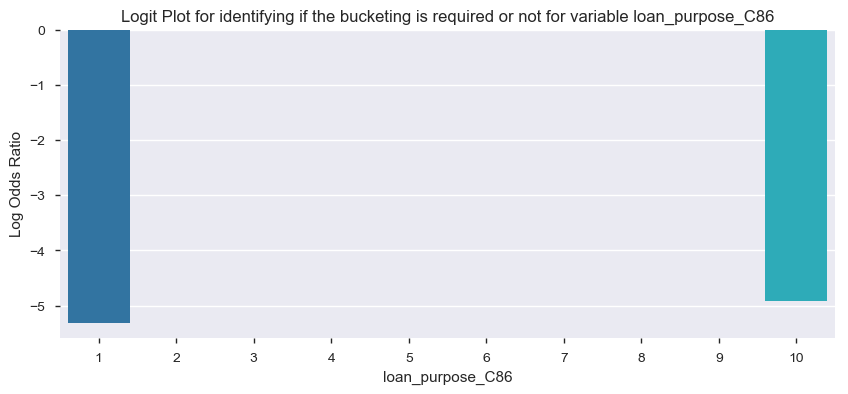

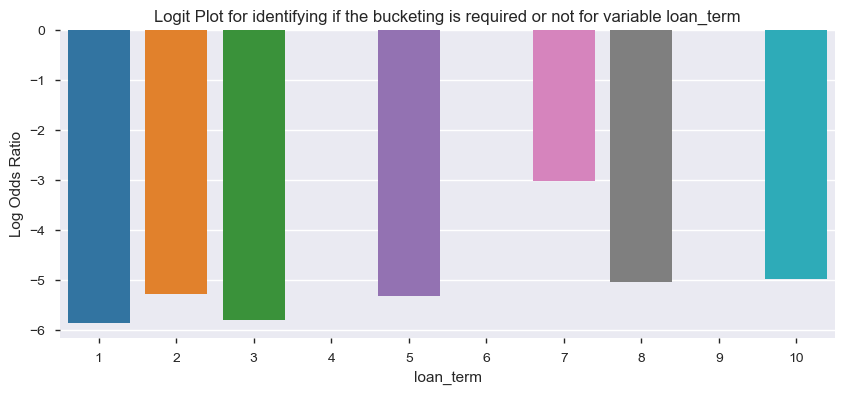

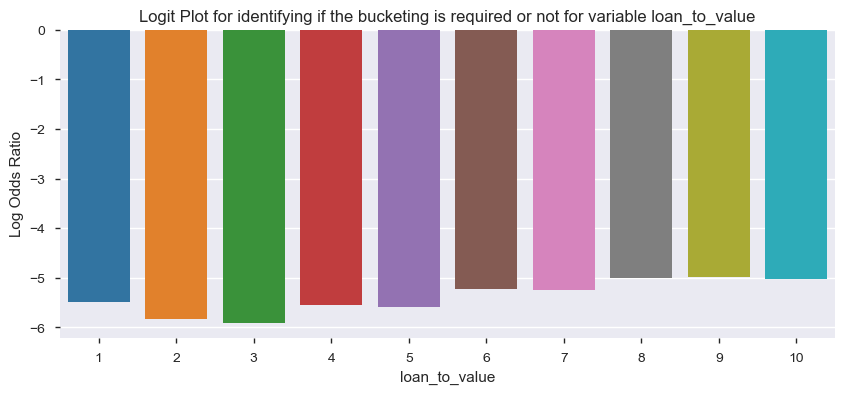

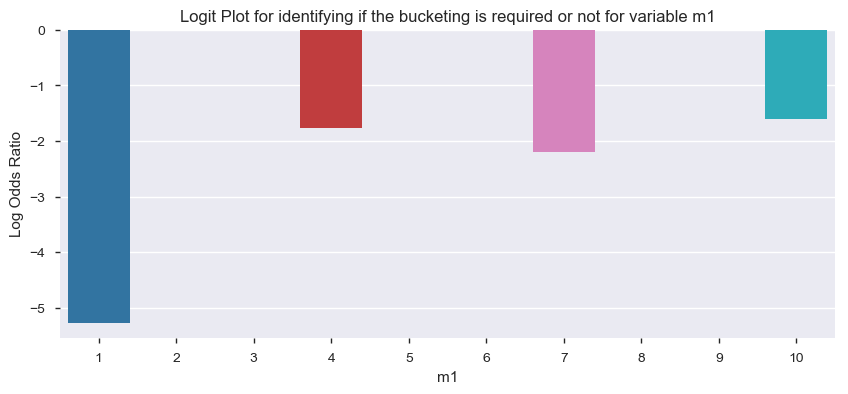

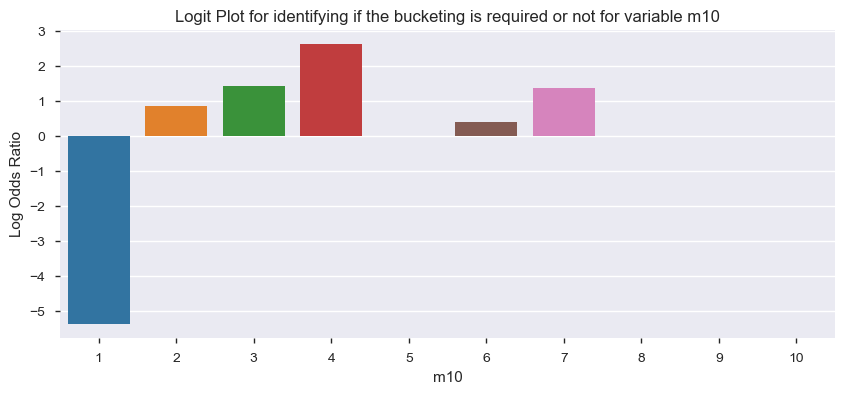

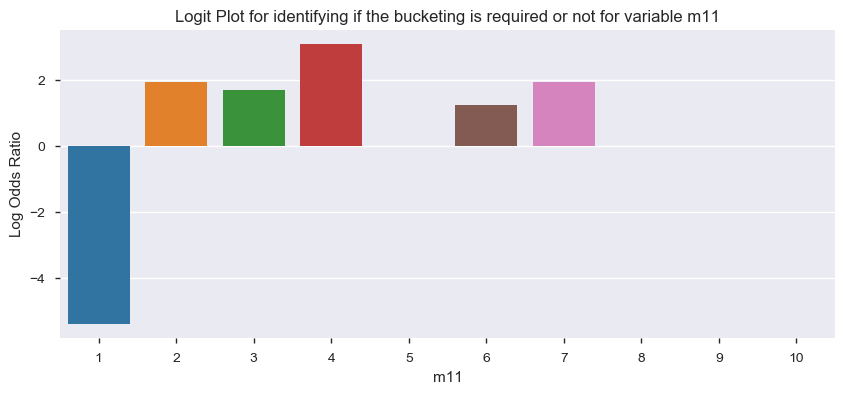

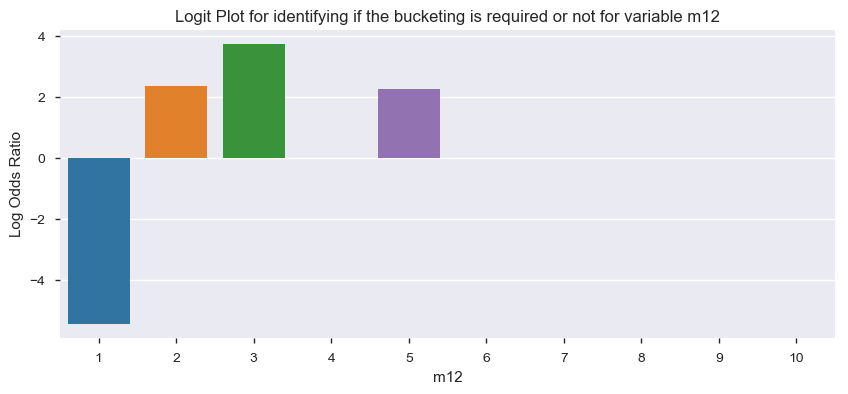

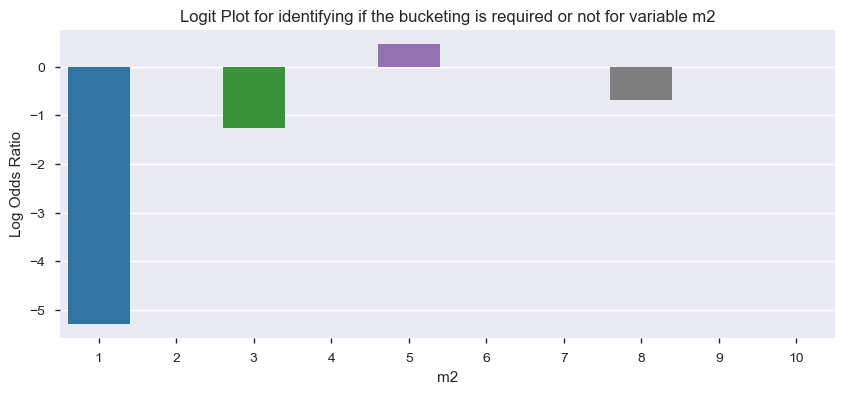

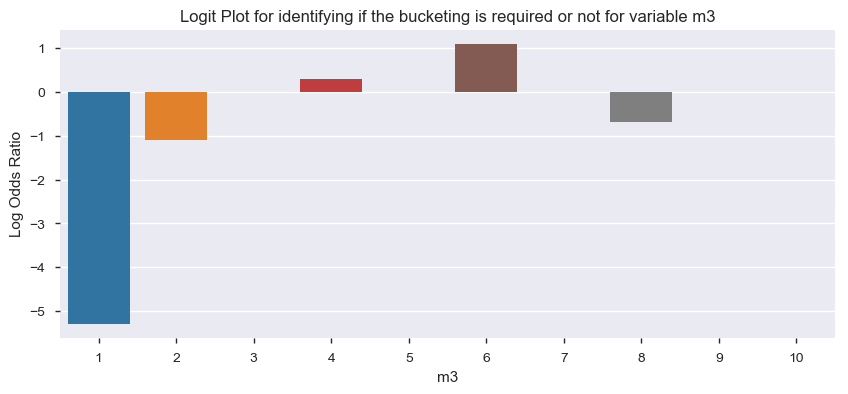

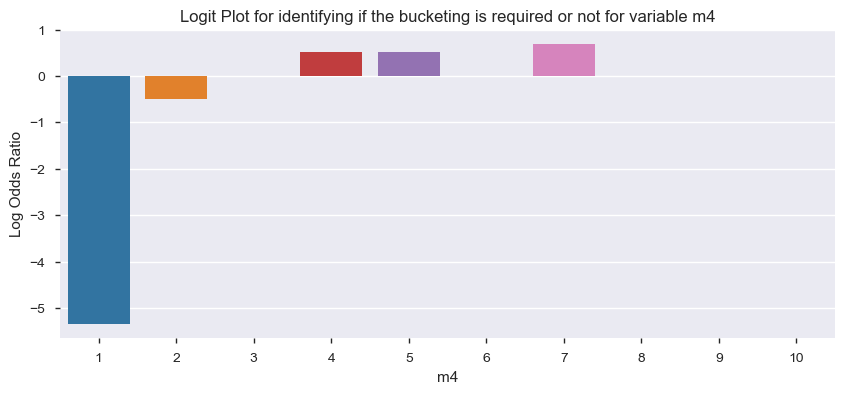

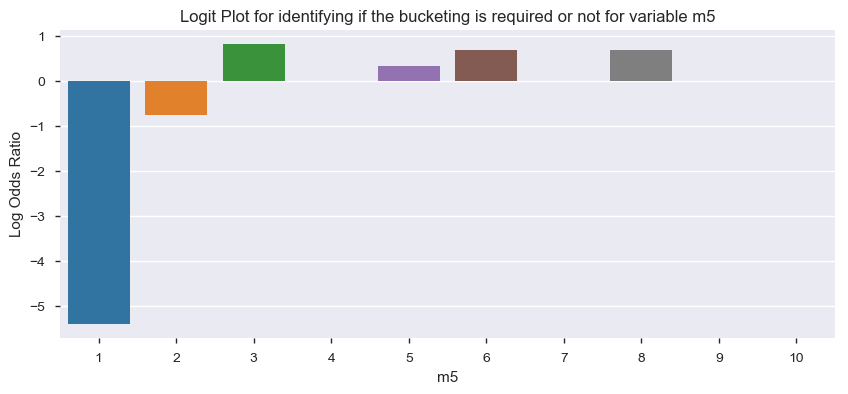

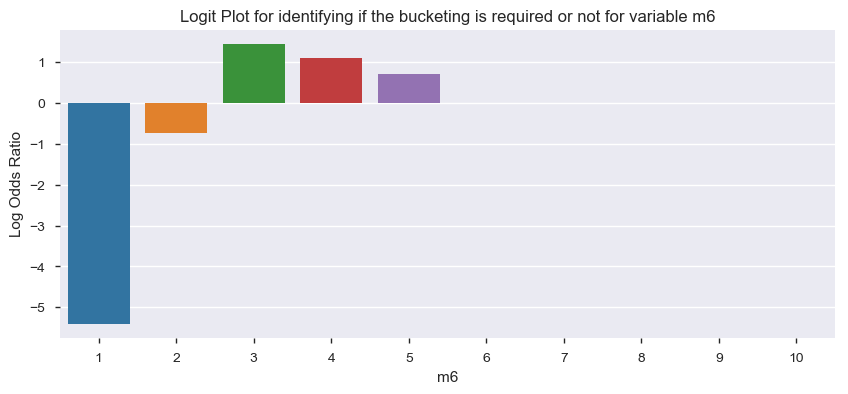

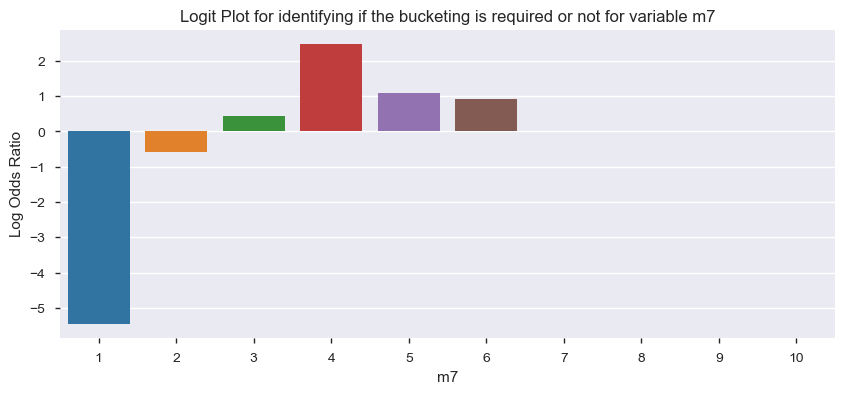

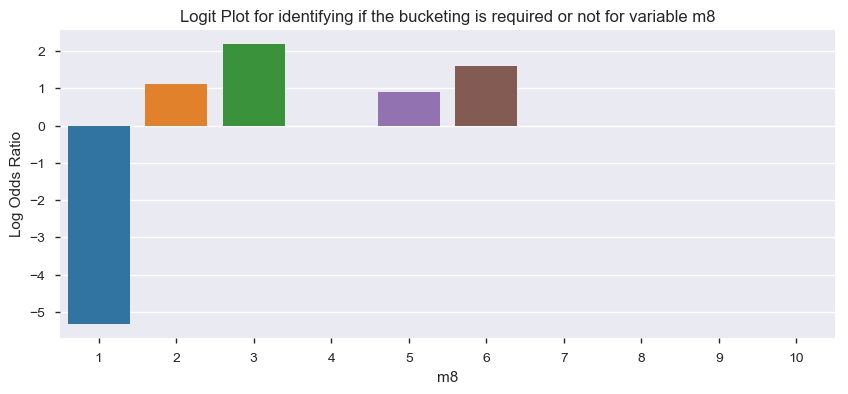

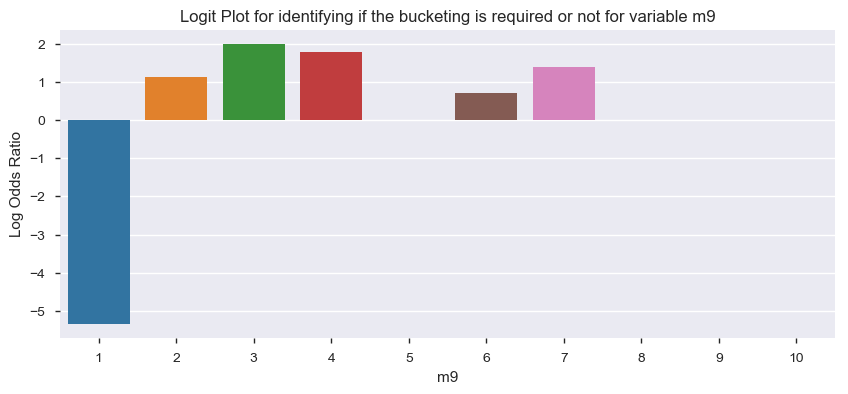

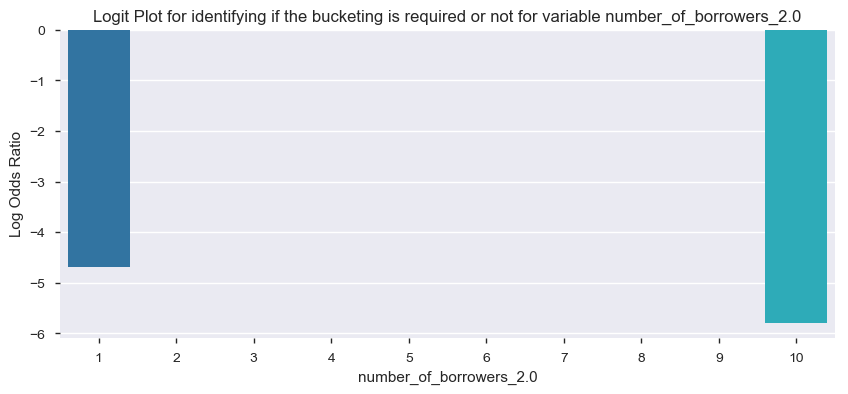

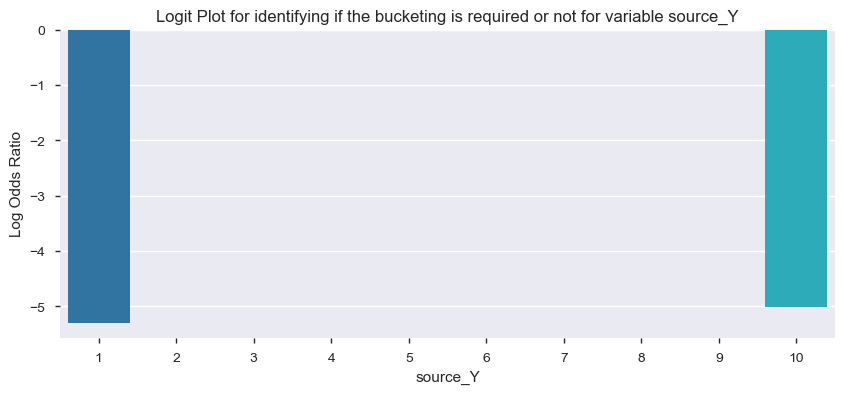

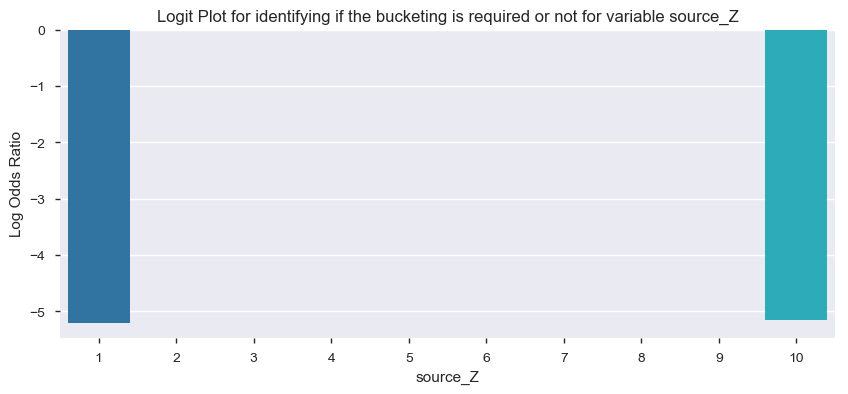

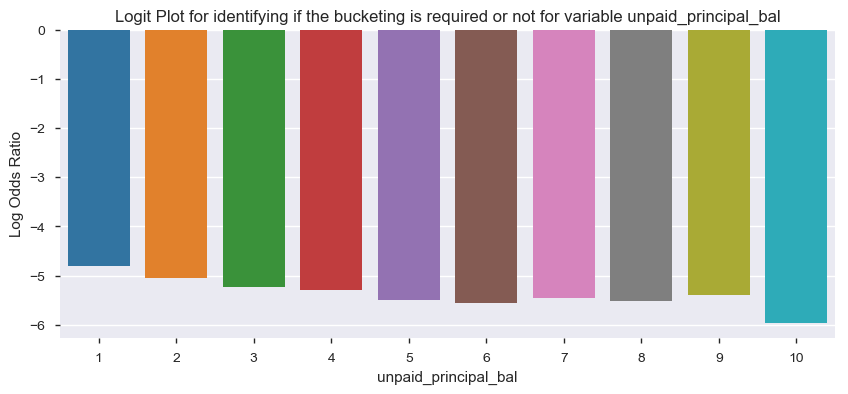

In [158]:
for feature in data_new.columns.difference(['m13']):
    binned = pd.cut(data_new[feature],bins=10, labels=list(range(1,11)))
    odds = data_new.groupby(binned)['m13'].sum() / (data_new.groupby(binned)['m13'].count()-data_new.groupby(binned)['m13'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(feature))

In [162]:
import statsmodels.formula.api as sm
from sklearn import metrics

In [163]:
somersd_df = pd.DataFrame()
for feature in data_new.columns.difference(['m13']):
    logreg = sm.logit(formula='m13~' + str(feature),data=data_new)
    result = logreg.fit()
    y_score = pd.DataFrame(result.predict(),columns=['Score'])
    somersD = 2 * metrics.roc_auc_score(y_score=y_score,y_true=data_new['m13']) - 1
    temp = pd.DataFrame([feature,somersD]).T
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.033101
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.033233
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.033997
         Iterations 9
         Current function value: 0.033979
         Iterations: 35


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.033994
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.033967
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.033996
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.033997
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.033997
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.033997
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.033992
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.033992
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.033992
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.033966

SyntaxError: invalid syntax (<unknown>, line 1)

In [166]:
somersd_df.sort_values(by=['SomersD'],ascending=False)

,Variable Name,SomersD
0,co_borrower_credit_score,0.36479
0,debt_to_income_ratio,0.303629
0,insurance_percent,0.0250291
0,financial_institution_Edwards_Hoffman,0.0227403
0,financial_institution_Swanson__Newton_and_Miller,0.0131702
0,financial_institution_Sanchez_Robinson,0.00875499
0,financial_institution_Suarez_Inc,0.00760335
0,financial_institution_Turner__Baldwin_and_Rhodes,0.00614039
0,financial_institution_OTHER,0.0052986
0,financial_institution_Cole__Brooks_and_Vincent,0.00474583
